In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn

#### SET DING0 SETTINGS

In [3]:
# TODO set in config file
ding0_default=False
retain_all=False #  weil sonst graphen außerhalb des polys unverbunden zum graphen beibehalten werden

In [4]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [5]:
%%time

print('ding0_default', ding0_default)
if ding0_default:
    
    lv_stations, lv_grid_districts = nd.import_mv_grid_districts(session, 
                                                                 mv_grid_districts_no=mv_grid_districts)

else:
    
    mvlv_subst_list, cluster_graph, nodes_w_labels = nd.import_mv_grid_districts(session, ding0_default, 
                                                               mv_grid_districts_no=mv_grid_districts,
                                                               need_parameterization=True,
                                                               retain_all=True, 
                                                               truncate_by_edge=False)

ding0_default False


Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnected nodes is 0.


bicycle_parking is not matched in config and will be categorized as leftover
bicycle_parking is not matched in config and will be categorized as leftover


Simplified graph: 1074 to 642 nodes, 2200 to 1336 edges
C:\Users\Robert\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


n_cluster 4


at least one node trespasses dist to substation.                                    cluster again with n_clusters+=1
after increment; n_cluster 5
C:\Users\Robert\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
all clusters are in range


Wall time: 6.37 s


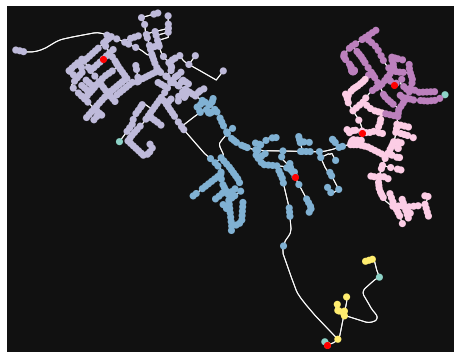

In [6]:
import pandas as pd
import osmnx as ox

nc = ox.plot.get_node_colors_by_attr(cluster_graph, attr='cluster', cmap="Set3") #

fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)

for station in mvlv_subst_list:
    
    ax.scatter(station.get('x'),station.get('y'), color='red')

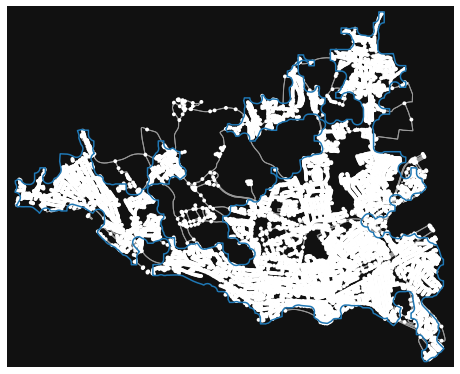

In [7]:
import osmnx as ox

fig, ax = ox.plot_graph(simp_graph, show=False, close=False)

x,y = geo_load_area.exterior.xy
ax.plot(x,y)  
    
#for station in mvlv_subst_list:
    
#    ax.scatter(station.get('x'),station.get('y'), color='red') 

In [8]:
import pyproj
from shapely.geometry import Point
from shapely.ops import transform

pyproj.__version__

'3.1.0'

In [26]:
# need to plot this poly to check if it contains buildings
# if no buildings skip and maybe load default ding0 load areal ? or nothing ?

import folium
from shapely import wkt

polygon = wkt.loads(u'POLYGON ((4280649.66118543 2733192.96358212, 4280652.23162465 2733191.14401754, 4280677.10559452 2733171.67933443, 4280679.57109515 2733169.53558295, 4280682.32291005 2733166.26830074, 4280682.36867518 2733166.18314461, 4280682.39597741 2733166.09040517, 4280682.40365295 2733165.99403557, 4280682.39137461 2733165.89814366, 4280680.99027165 2733161.86273429, 4280679.45467087 2733158.97893575, 4280633.32011754 2733082.19079191, 4280631.62527479 2733079.65629981, 4280628.94193936 2733076.68571781, 4280628.85925632 2733076.62383061, 4280628.76621011 2733076.57900974, 4280628.66627825 2733076.55293036, 4280628.56319567 2733076.54656717, 4280628.46081501 2733076.56015799, 4280624.66806574 2733077.84066546, 4280621.95085033 2733079.22373546, 4280579.05810256 2733103.73868397, 4280576.52547223 2733105.35434468, 4280573.50858927 2733107.96693295, 4280573.44526624 2733108.048084, 4280573.39881927 2733108.13994248, 4280573.37099947 2733108.23904525, 4280573.36285566 2733108.34165606, 4280573.37469486 2733108.44390641, 4280573.40607073 2733108.54194138, 4280575.33416572 2733112.03617232, 4280577.1523796 2733114.4275473, 4280632.12488847 2733179.86666707, 4280637.92176414 2733187.48707355, 4280640.79926137 2733191.67563158, 4280642.17701174 2733194.16686924, 4280643.98187605 2733194.36630572, 4280644.7637164 2733194.53409662, 4280645.54371172 2733194.80179476, 4280645.86514527 2733194.83536197, 4280645.96865245 2733194.82623389, 4280646.06851543 2733194.79752077, 4280649.66118543 2733192.96358212))')

wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:3035')

project = pyproj.Transformer.from_crs(utm, wgs84, always_xy=True).transform
utm_poly = transform(project, polygon)

m = folium.Map([47.711066,9.4603178], zoom_start=16)
folium.GeoJson(utm_poly).add_to(m)
m
